ECM1416 2023CW <br>
Student ID: 720051554<br><br>
<u>Exercise 1</u>
<br><br>
(a) Write a program that performs the transformation of points in Parts 1-4 induced by matrix A.

The function transformPoint() carrys out matrix multiplication by multiplying the transformation matrix 
$$ \mathbf{A} = 
\frac{1}{b} 
\begin{bmatrix}
b & 1 \\
-1 & 1 \\ 
\end{bmatrix}
$$
Dividing through by $\mathbf{b}$, removing the external scalar gives:
$$ \mathbf{A} = 
\begin{bmatrix}
1 & \frac{1}{b}  \\
-\frac{1}{b}  & \frac{1}{b}  \\ 
\end{bmatrix}
$$
This matrix is then, in turn, multiplied by each individual set of coordinates within each part 1-4. For 2 matricies to be multiplicable the number of columns of the 1st matrix ($\mathbf{A}$) must equal the number of rows of the 2nd matrix (coordinates). Initially my coordinates are in the form $\mathbf{[x,y]}$, this form is not compatible for a matrix multiplication with $\mathbf{A}$. To combat this I use the predefiend operation $\mathbf{T}$ imported with numpy which transposes a matrix which means swapping the elements in the rows and the columns.
converting $\mathbf{[x,y]}$ to
$$ \begin{bmatrix}
x \\
y \\ 
\end{bmatrix}
$$
The result of:
$$ \begin{bmatrix}
1 & \frac{1}{b}  \\
-\frac{1}{b}  & \frac{1}{b}  \\ 
\end{bmatrix}
*
\begin{bmatrix}
x \\
y \\ 
\end{bmatrix}
$$
will have the same number of rows as the 1st matrix, and the same number of columns as the 2nd matrix so in this case will be the transformed set of coordinates
$$ \begin{bmatrix}
x' \\
y' \\ 
\end{bmatrix}
$$


Once the transformed points for each part are put together they become the set of coordinates of the image of the part

<br><br>

(b) Let a = 4 and b = 3, run your program and output two figures, a figure showing the diagram produced before
the transformation, and a figure showing the diagram after the transformation

By substituting values for $\mathbf{a}$ and $\mathbf{b}$ into the transfomed coordinates calculated in part a gives exact coordinate. Substituting $\mathbf{b=3}$ into matrix $\mathbf{A}$ gives:
$$ \mathbf{A} = 
\begin{bmatrix}
1 & \frac{1}{3}  \\
-\frac{1}{3}  & \frac{1}{3}  \\ 
\end{bmatrix}
$$
This is the tranfomation matrix used to perform the transformation of each part.<br>
The diagram before transformation is each part represented on the graph with the correct corresponding coordinates connected, this is repeated for the diagram after the transformation, using the transformed sets of coordinates.


In [2]:
# import libraries for array and matix handelling, calculus and graph plotting
import numpy as np
import sympy as sym 
from sympy import sympify
import matplotlib.pyplot as plt


def transformPoint(matrix,coords):
    """
    Function to perform transformation on the point given induced by the matrix passed.
    @param matrix: numpy matrix of the transformation matrix
    @param coords: array of a single set of coordinates
    @return newPoint: numpy matrix of the transformed coordinates
    """
    # transopose of coords is used so it has the correct dimensions to be multiplied
    newPoint = matrix*(coords.T)
    return newPoint


def transformSetOfPoints(matrix,points):
    """
    Function to transform a set of coordinates using the matrix given.
    @param matrix: numpy matrix of the transformation matrix
    @param points: 2D array of the set of coordinates 
    @return imgPoint: 2D array of the transformed set of points.
    """
    imgPoints = []
    # loops through list of points 
    for i in points:
        # if no connection between adjacent points repeat this in the transformation
        if i == []:
            imgPoints.append([])
        else:
            # call function to transform a single set of coordinates
            img = transformPoint(matrix, np.matrix(i))
            point=[]
            # put coordinates in sympy expression
            for i in img:
                expr = sympify(str(i).replace('[','').replace(']',''))
                point.append(expr)
            imgPoints.append(point)
    return imgPoints


def subToArray(part,aVal,bVal):
    """
    Function to substitues given values into a 2D array. 
    @param part: 2D array of the set of coordinates
    @param aVal: integer value to replace a in expressions
    @param bVal: integer value to replace b in expressions
    @return part: returns a list of the calculates set of coordinates
    """
    # loops through each sub element of the array
    for i in range (0,len(part)):
        for j in range (0,len(part[i])):
            # substitutes given values into the expression for a and b 
            vals = part[i][j].subs({a:aVal, b:bVal})
            part[i][j]= vals 
    return part 
        

# displays a set of coordinates onto the graph  
def displayCoords(part,colour,aVal,bVal,lineLabel):
    """
    Function to displays a set of coordinates onto the graph. No values are returned, the graphs are plotted within this function.
    @param part: 2D array of the set of coordinates
    @param colour: string of the colour of the line to be plotted
    @param aVal: integer value to replace a in expressions
    @param bVal: integer value to replace b in expressions
    """
    # if there is a disconnection between two coordinates
    if [] in part:
        # evaluate set of coordinates
        part = subToArray(part,aVal,bVal)
        # convert array to lists of x and y coordinates
        PLOT1x, PLOT1y = np.array(part[:part.index([])]).T
        # plot first set of coordinates
        plt.plot(PLOT1x,PLOT1y,colour,label=lineLabel)
        # convert array to lists of x and y coordinates
        PLOT2x, PLOT2y = np.array(part[part.index([])+1:]).T
        # plot second set of coordinates
        plt.plot(PLOT2x,PLOT2y,colour)  
    # if no disconnection between coords
    else:
        # evaluate set of coordinates
        part = subToArray(part,aVal,bVal)
        vertices = np.array(part) 
        # convert array to lists of x and y coordinates  
        PLOTx, PLOTy = vertices.T
        # plot second set of coordinates
        plt.plot(PLOTx,PLOTy,colour,label=lineLabel)


# set calculus variables for replacing lates
a,b = sym.symbols('a b')
# create transformation matrix
A = np.matrix([[1,1/b],[-1/b,1/b]])

# store coordinates in each part where an empty [] represents a disconnection between the points
part1 = [[a,a],[a,-a],[-a,-a],[-a,a],[a,a]]
part2 = [[1-a,a-1],[-a/4,a-1],[-a/4,a/2],[1-a,a/2],[1-a,a-1]]
part3 = [[a/4,a-1],[a-1,a/2],[],[a-1,a-1],[a/4,a/2]]   
part4 = [[a-1,-a/4],[a-1,-a/2],[1-a,-a/2],[1-a,-a/4]]


# display original coordinates
fig1 = plt.figure()
ax = fig1.add_subplot(111)
displayCoords(part1,'r',4,3,'Part1')
displayCoords(part2,'g',4,3,'Part2')
displayCoords(part3,'b',4,3,'Part3')
displayCoords(part4,'orange',4,3,'Part4')
# adds title to the graph
plt.title('Diagram produced before the transformation')
# adds key labelling each line
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
# labels axis
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
# displays the graph
plt.show()

# calculate and display transformed coordinates
fig2 = plt.figure()
ax = fig2.add_subplot(111)
newPart1 = transformSetOfPoints(A,part1)
displayCoords(newPart1,'r',4,3,"Part1'")
newPart2 = transformSetOfPoints(A,part2)
displayCoords(newPart2,'g',4,3,"Part2'")
newPart3 = transformSetOfPoints(A,part3)
displayCoords(newPart3,'b',4,3,"Part3'")
newPart4 = transformSetOfPoints(A,part4)
displayCoords(newPart4,'orange',4,3,"Part4'")
# adds title to the graph
plt.title('Diagram produced after the transformation')
# adds key labelling each line
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# labels axis
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
# displays graph 
plt.show()


ModuleNotFoundError: No module named 'numpy'

<u>Exercise 2</u>
<br><br>
(a) Write a program to apply the Euler’s method to obtain the numerical (approximated) solution, with step sizes
of 1, 0.2, and 0.05 on the interval [0, 5], respectively.

To calculate the approximate result of a differential equation an numerical method is used, here the Euler method is used 

$$ y_{n+1} = y_{n} +hf(x_{n},y_{n})$$
where $\mathbf{x_{n} = x_{0} +nh}$ and $\mathbf{n = 1,2,3,4,..}$

In this case:
$ f(x,y) = x + 0.2y $

The step size is represented as $\mathbf{h}$ and is the value incremented to $\mathbf{x}$ to find the next $\mathbf{x}$ coordinate of the line. In this case $\mathbf{x}$ is incremented until it is 5, the interval maximum.

<br><br>
(b) Work out the analytical (exact) results. Plot figures to compare the numerical results to the analytical results
on the interval [0, 5]. Discuss the comparison results


Working out the analytical result of:
$$ \frac{dy}{dx} = x + \frac{y}{5} $$

For this differential equation I have used the Integrating Factor method to find the exact solution 
1) Find the Integrating Factor (IF) by using the formula: $$ IF = e^{\int P(x) dx} $$ Rearranging the given to the form: $$ \frac{dy}{dx} + P(x)y = Q(x) $$ Gives: $$ \frac{dy}{dx} - \frac{y}{5} = x $$ So $$P(x)=-\frac{1}{5}$$
Therefore: $$ IF = e^{\int -\frac{1}{5} dx}$$ $$IF = e^{-\frac{x}{5}}$$

2) Multiply the Integrating Factor through the rearranged differential equation:$$ e^{-\frac{x}{5}}\frac{dy}{dx} - e^{-\frac{x}{5}}(\frac{y}{5}) = e^{-\frac{x}{5}}x $$ Which can now be written in the form:$$ \frac{d}{dx}[e^{-\frac{x}{5}}y] = e^{-\frac{x}{5}}x$$

3) Integrate both sides of the equation, which will cancel out the derivative on the left-hand side of the equation: $$e^{-\frac{x}{5}}y = \int \ xe^{-\frac{x}{5}} dx$$ Integrate using integration by parts where $v=x$ and $u'=e^{-\frac{x}{5}}$. Therefore $v'=1$ and $u=-5e^{-\frac{x}{5}}$
$$e^{-\frac{x}{5}}y = -5xe^{-\frac{x}{5}} - \int \ -5e^{-\frac{x}{5}} dx$$
$$e^{-\frac{x}{5}}y = -5xe^{-\frac{x}{5}} - 25e^{-\frac{x}{5}} + c$$
$$e^{-\frac{x}{5}}y = -5xe^{-\frac{x}{5}} - 25e^{-\frac{x}{5}} + c$$
$$e^{-\frac{x}{5}}y = -5e^{-\frac{x}{5}}(x+5) + c$$ 
Substituting in the values f(0)=-3 for x=0 y=-3: 
$$e^{-\frac{0}{5}}(-3) = -5e^{-\frac{0}{5}}(0 +5) + c$$ 
$$-3 = -25 + c$$ 
$$c = 22$$
This gives and exact solution of:
$$y = \frac{-5e^{-\frac{x}{5}}(x+5) + 22}{e^{-\frac{x}{5}}}$$
Which simplifies to:
$$y = -25(0.2x + 1) + 22e^{\frac{x}{5}}$$
This is the equation that I then used to plot the exact solution in the graph below, along side those plotted using the Euler method. 
<br><br>
Below the graph I have discussed the comparison between the different sets of results.


9.80220022609899


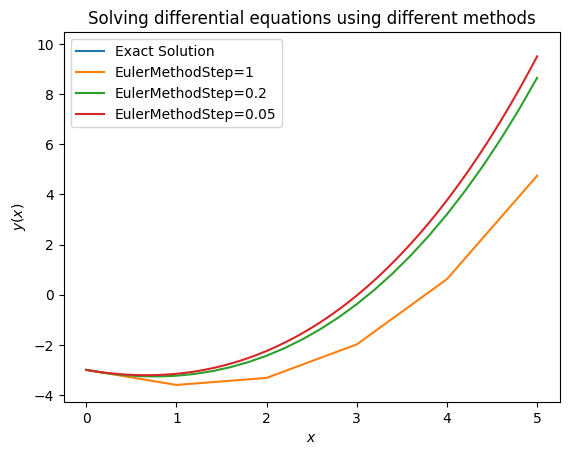

In [ ]:
# import libraries for array handelling and graph plotting
import matplotlib.pyplot as plt
import numpy as np


def oneStep(x,y,h):
    """
    This function carries out the one step Euler method using the given variable
    @param x: integer or float value of x0
    @param y: integer or float value of y0
    @param h: integer or float value for the step size used 
    @return nexty: returns integer or float value of y1
    """
    # performs the Euler funtion to find the next value of y
    nexty = y + (h*(x + (0.2*y)))
    return nexty


def allSteps(x,y,h,intervalMin,intervalMax):
    """
    This function carries out the Euler method between the given interval
    @param x: integer or float value of x0
    @param y: integer or float value of y0
    @param h: integer or float value for the step size used
    @param intervalMin: integer value of the minimum value of x
    @param intervalMax: float value of the maximum value of x   
    @return data: returns 2D array of the coordinates given by the Euler method
    """
    # creates an empty array to be appended
    data = []
    while intervalMin <= intervalMax:
        data.append([x,y])
        # finds the next value of y
        y = oneStep(x,y,h)
        # calculates the next value of x
        x= round(x+h,2)
        # removes floating point inaccuracies
        intervalMin = round(intervalMin + h,2)
    return data
    

# sets given variables
xZero,yZero = 0,-3
intervalMin,intervalMax = 0,5.00
nStep1 = 1
nStep2 = 0.2
nStep3 = 0.05

# plots analytical result 
x = np.linspace(0,5,100)
# the equation of the line calculated above
y = -25*((0.2*x)+1)+22*np.exp(0.2*x) 
fig = plt.figure()
# plot the analytical result 
plt.plot(x,y)

# plots numerical solution with a step of 1
data1 = allSteps(xZero,yZero,nStep1,intervalMin,intervalMax)
# converts data to numpy so the x and y coordinates can be extracted and plotted 
coords1 = np.array(data1)
PLOT1x, PLOT1y = coords1.T
plt.plot(PLOT1x,PLOT1y)

# plots numerical solution with a step of 0.2
data2 = allSteps(xZero,yZero,nStep2,intervalMin,intervalMax)
# converts data to numpy so the x and y coordinates can be extracted and plotted 
coords2 = np.array(data2)
PLOT2x, PLOT2y = coords2.T
plt.plot(PLOT2x,PLOT2y)

# plots numerical solution with a step of 0.05
data3 = allSteps(xZero,yZero,nStep3,intervalMin,intervalMax)
# converts data to numpy so the x and y coordinates can be extracted and plotted 
coords3 = np.array(data3)
PLOT3x, PLOT3y = coords3.T
plt.plot(PLOT3x,PLOT3y)

# the following methods add label information to the graph
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title('Solving differential equations using different methods')
# lables the lines using a key
plt.legend(('Exact Solution', 'EulerMethodStep=1', 'EulerMethodStep=0.2', 'EulerMethodStep=0.05'))
plt.show()

<u>Comparing results</u>

Using the code above I calculated the various solutions,to 2d.p, to the equation $$ \frac{dy}{dx} = x + \frac{y}{5} $$ For $y(5)$
Numerical solution:<br>
When step size = 1: $y(5)=4.73$<br>
When step size = 0.2: $y(5)=8.65$<br>
When step size = 0.05: $y(5)=9.51$<br><br>
Exact solution:<br>
$y(5)=9.80$<br><br>
We can see that the smaller the step size used the closer the solution gets to the exact solution, to further use this we can calculate the errors associated (all to 2d.p.) with each step size, using the following formulas:<br>
$$ AbsoluteError = |Actual Value – Approximation|$$
$$ RelativeError = \frac{AbsoluteError}{|Actual Value|} *100$$

When step size = 1: 
$$ AbsoluteError = |9.80 – 4.73|$$
$$ AbsoluteError = 5.07$$
$$ RelativeError = \frac{5.07}{|9.80|} *100$$
$$ RelativeError = 0.5173... *100$$
$$ RelativeError = 51.73\%$$ 

When step size = 0.2: 
$$ AbsoluteError = |9.80 – 8.65|$$
$$ AbsoluteError = 1.15$$
$$ RelativeError = \frac{1.15}{|9.80|} *100$$
$$ RelativeError = 0.1173... *100$$
$$ RelativeError = 11.73\%$$ 

When step size = 0.05: 
$$ AbsoluteError = |9.80 – 9.51|$$
$$ AbsoluteError = 0.29 2d.p.$$
$$ RelativeError = \frac{0.29}{|9.80|} *100$$
$$ RelativeError = 0.0295... *100$$
$$ RelativeError = 2.96\%$$ 

<br>
The smaller the percentage error the more accurate the approximation, and we can clearly see from the relative error results that as the step size decreases the accuracy of the approximation increases.
